In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df = pd.concat([df_train, df_test])

In [4]:
df.set_index('id', inplace = True)
df.head(5)

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0.0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0.0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0.0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0.0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0.0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(1488028, 58)
(595212, 59)
(892816, 58)


In [6]:
df.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,...,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06
mean,0.036448,1.901574e+00,1.358745e+00,4.417567e+00,4.171346e-01,4.069547e-01,3.934442e-01,2.571276e-01,1.637637e-01,1.856645e-01,...,5.439640e+00,1.440927e+00,2.873923e+00,7.539831e+00,1.232027e-01,6.277899e-01,5.544687e-01,2.875504e-01,3.492159e-01,1.527841e-01
std,0.187401,1.985417e+00,6.636391e-01,2.700054e+00,4.933963e-01,1.353300e+00,4.885141e-01,4.370505e-01,3.700612e-01,3.888358e-01,...,2.331197e+00,1.201557e+00,1.694398e+00,2.746189e+00,3.286698e-01,4.833941e-01,4.970245e-01,4.526205e-01,4.767225e-01,3.597794e-01
min,0.000000,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,1.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000,3.000000e+00,2.000000e+00,6.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,7.000000e+00,2.000000e+00,4.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,1.000000,7.000000e+00,4.000000e+00,1.100000e+01,1.000000e+00,6.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,2.000000e+01,1.100000e+01,1.500000e+01,2.800000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


From the summary of the dataset, we note that there are some features which ends with the word 'bin', while other words might end with the letter 'cat'. Also, we note that there are negative values in the dataset.

A quick look at the Kaggle page seems to suggest that features that end with the word 'bin' are binary features, while features which end with the word 'cat' are categorical features. 

In the data from [Kaggle page](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data) there are missing values (as indicated by a '-1') in the dataset. Let's check for missing values in the dataframe.

In [7]:
(pd.DataFrame(np.sum(df.apply(lambda x: x == -1))
    /len(df))[0][pd.DataFrame(np.sum(df.apply(lambda x: x == -1))/len(df))[0] != 0])

ps_ind_02_cat    3.514719e-04
ps_ind_04_cat    1.532229e-04
ps_ind_05_cat    9.757209e-03
ps_reg_03        1.810826e-01
ps_car_01_cat    1.794321e-04
ps_car_02_cat    6.720304e-06
ps_car_03_cat    6.909426e-01
ps_car_05_cat    4.481838e-01
ps_car_07_cat    1.936792e-02
ps_car_09_cat    9.717559e-04
ps_car_11        4.032182e-06
ps_car_12        6.720304e-07
ps_car_14        7.152083e-02
Name: 0, dtype: float64

We note that 3 features, `ps_car_03_cat`, `ps_car_05_cat` and `ps_reg_03` contains a significant amount of missing values (>15% of values are missing from the dataframe).
While we can assume that Porto Seguro has mapped all missing values to take on the value -1, let's check whether there are any remaining missing values

In [8]:
np.sum(pd.isnull(df))

target            892816
ps_ind_01              0
ps_ind_02_cat          0
ps_ind_03              0
ps_ind_04_cat          0
ps_ind_05_cat          0
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03              0
ps_car_01_cat          0
ps_car_02_cat          0
ps_car_03_cat          0
ps_car_04_cat          0
ps_car_05_cat          0
ps_car_06_cat          0
ps_car_07_cat          0
ps_car_08_cat          0
ps_car_09_cat          0
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              0
ps_car_12              0
ps_car_13              0
ps_car_14              0
ps_car_15              0
ps_calc_01             0
ps_calc_02             0


It turns out that there is none.
Before proceeding to remove these features, let's take a look at the correlation between our features and the target label.

To do this, we separate the features into categorical features, and binary + numeric features.

In [9]:
categorical_features = df.columns[df.columns.str.endswith('cat')].tolist()
binary_features = df.columns[df.columns.str.endswith('bin')].tolist()
numeric_features = [feature for feature in df.columns.tolist()
                    if feature not in categorical_features and feature not in binary_features]

In [10]:
binary_numeric = binary_features + numeric_features

But some categorical features can be binary and we should categorize them as binary features.
To find this we have to list all the values taken by each categorical feature.
For this we can use set function to find unique values each feature can take.

In [11]:
df[categorical_features].apply(set)

ps_ind_02_cat                                     {1, 2, 3, 4, -1}
ps_ind_04_cat                                           {0, 1, -1}
ps_ind_05_cat                            {0, 1, 2, 3, 4, 5, 6, -1}
ps_car_01_cat           {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -1}
ps_car_02_cat                                           {0, 1, -1}
ps_car_03_cat                                           {0, 1, -1}
ps_car_04_cat                       {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
ps_car_05_cat                                           {0, 1, -1}
ps_car_06_cat    {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
ps_car_07_cat                                           {0, 1, -1}
ps_car_08_cat                                               {0, 1}
ps_car_09_cat                                  {0, 1, 2, 3, 4, -1}
ps_car_10_cat                                            {0, 1, 2}
ps_car_11_cat    {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
dtype: object

There are 6 features that are binary in categorical features.

In [12]:
for feature in ['ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_ind_04_cat']:
    binary_numeric.append(feature)
    binary_features.append(feature)
    categorical_features.remove(feature)

In [13]:
df[df == -1] = np.nan

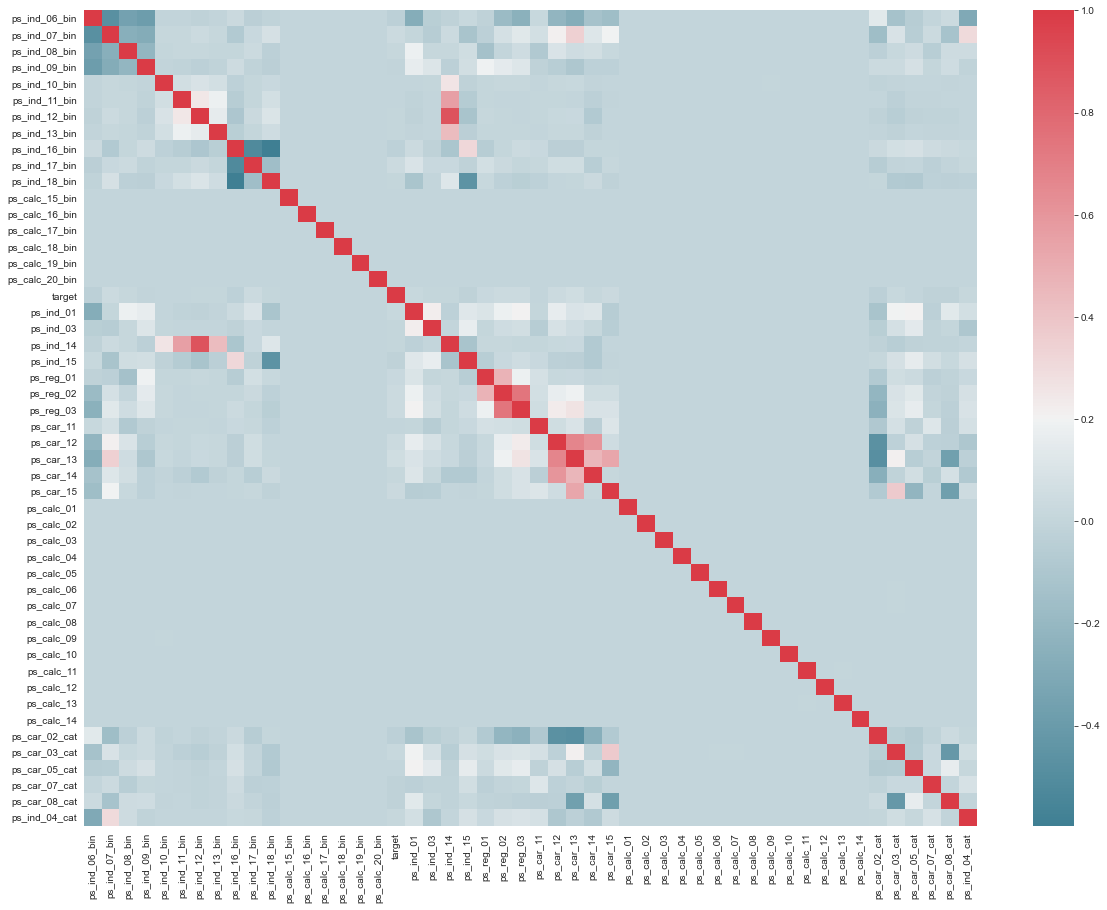

In [14]:
sns.set_style('white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(20,15))

sns.heatmap(df[binary_numeric].corr(), cmap=cmap)

plt.show()

From this heatmap, we note that only a handful of features are informative of the target label. In particular, we note that the ps_calc_ features are not correlated with any other features. Let's take a closer look at the correlation between our features and the target label

In [15]:
print (len(numeric_features))
print (len(binary_features))

27
23


C:\Users\gopik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


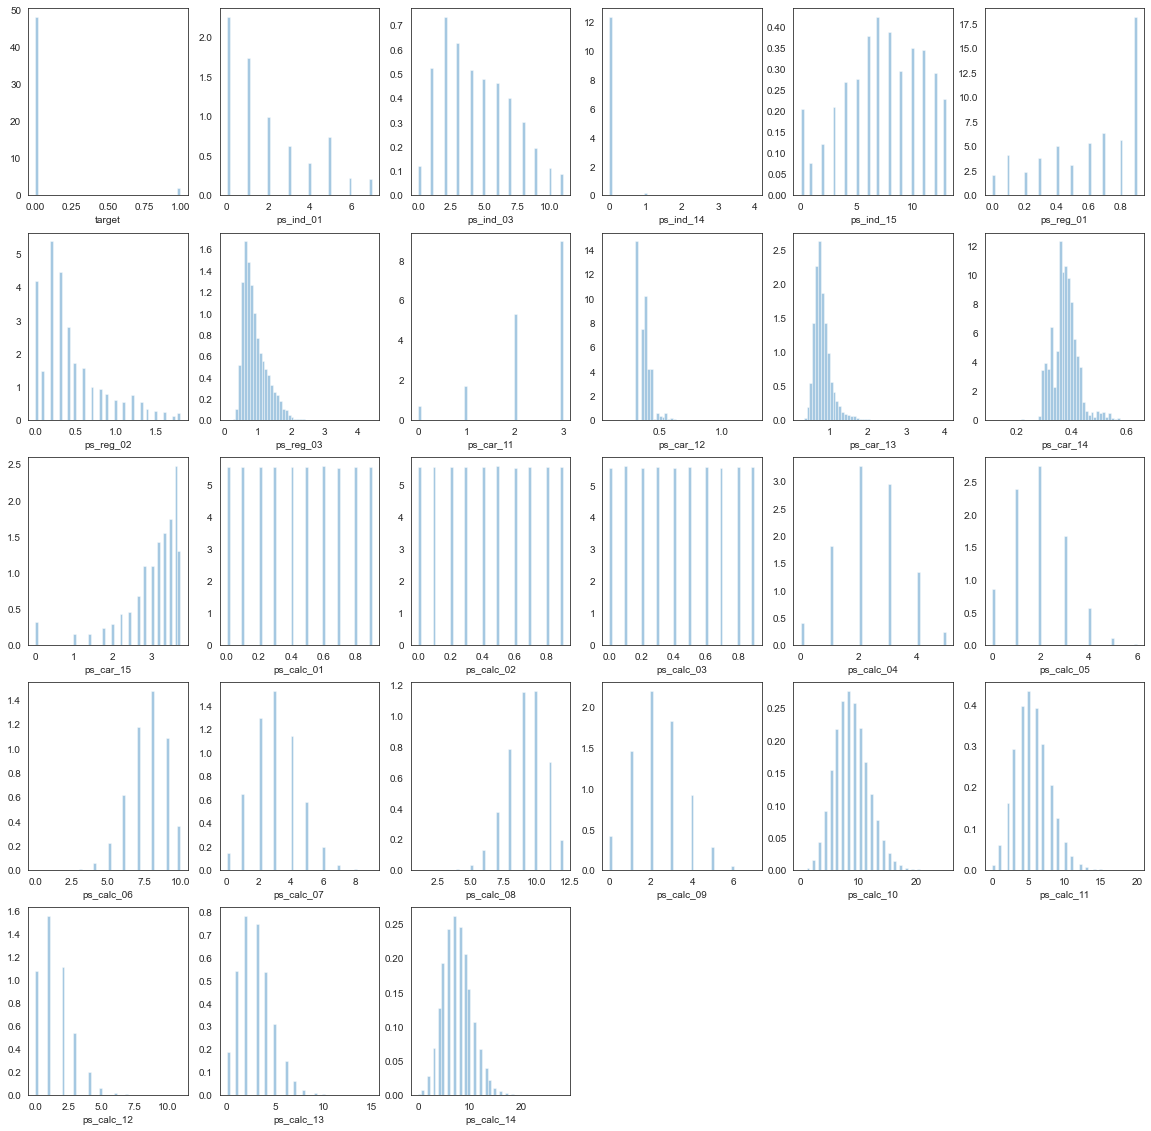

In [16]:
plt.figure(figsize=(20,20))
for idx, num_feat in enumerate(numeric_features):
    plt.subplot(5, 6, idx+1)
    sns.distplot(df[num_feat].dropna(), kde = False, norm_hist=True)

plt.show()

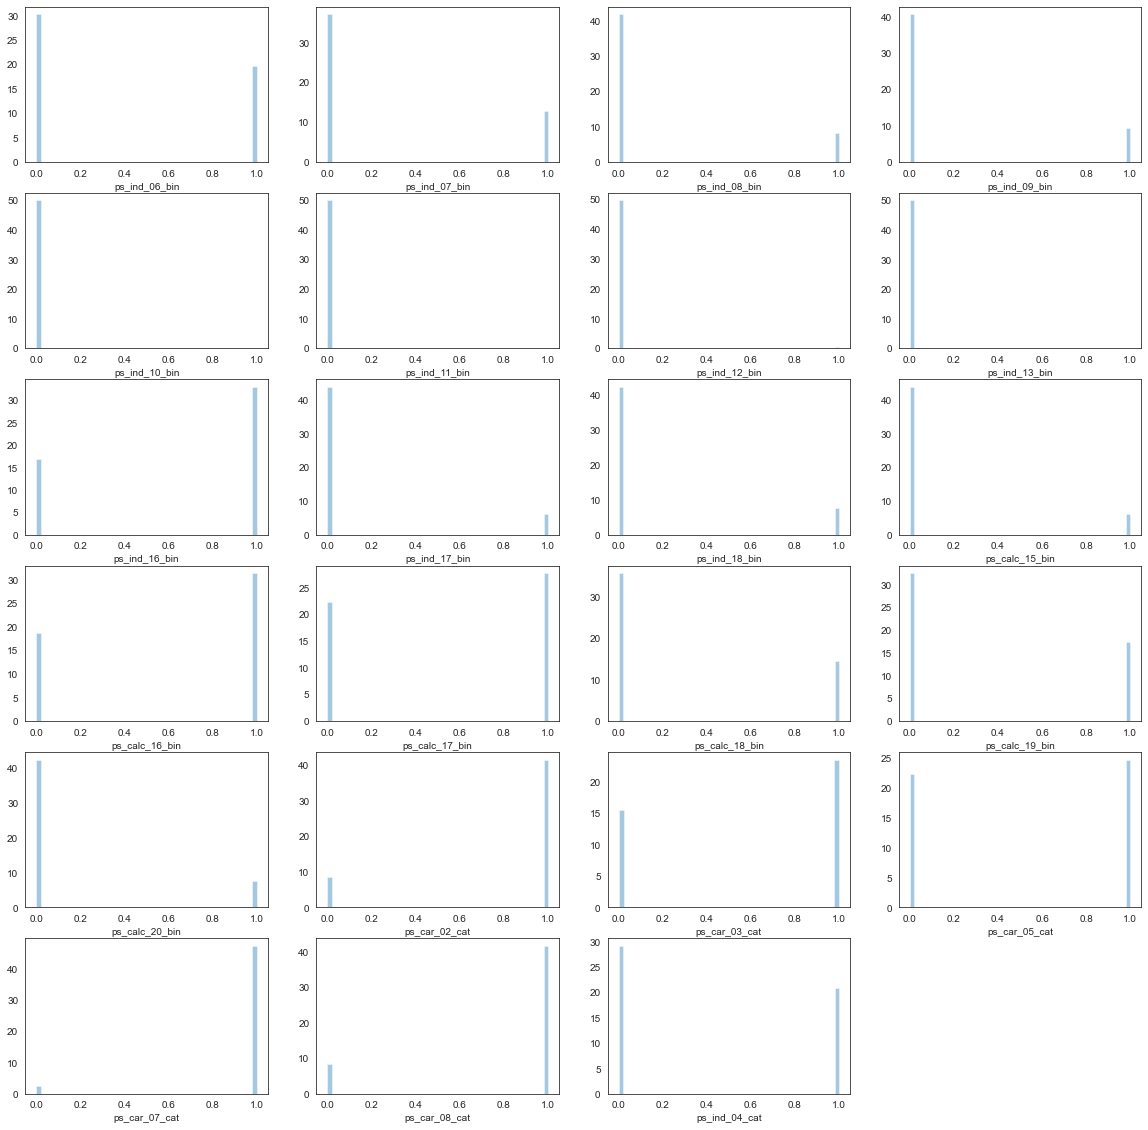

In [17]:
plt.figure(figsize=(20,20))
for idx, bin_feat in enumerate(binary_features):
    plt.subplot(6, 4, idx+1)
    sns.distplot(df[bin_feat].dropna(), kde = False, norm_hist=True)

plt.show()

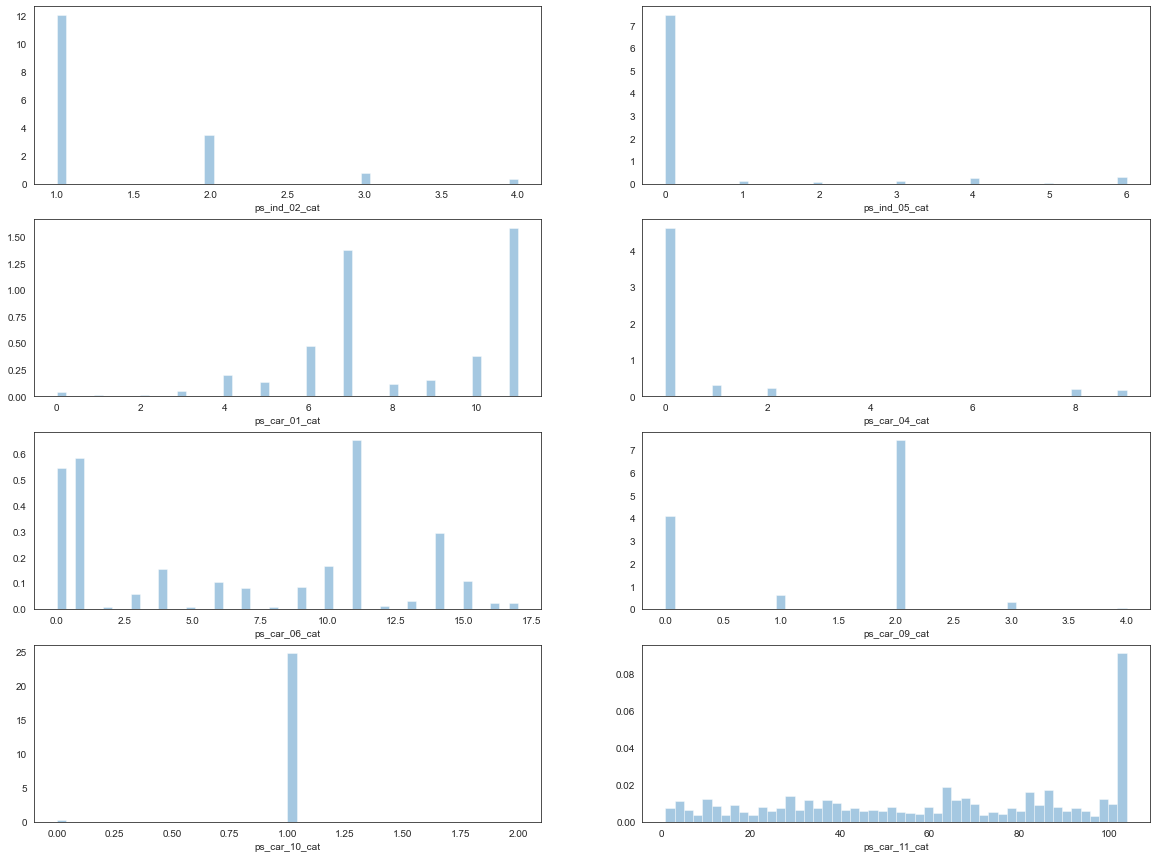

In [18]:
plt.figure(figsize=(20,15))

for idx, cat_feat in enumerate(categorical_features):
    plt.subplot(4, 2, idx+1)
    sns.distplot(df[cat_feat].dropna(), kde=False, norm_hist=True)
    
plt.show()

From what we have previously seen, we can now proceed to extract features which are more informative of the target label. For example, we note that the feature, ps_car_01_cat and ps_cat_06_cat are pretty informative.

Using the correlation matrix (in the form of a heatmap) done previously, we impose an artificial correlation threshold (with the target label) of 0.005 to select key binary and numeric features from our dataset.

In [19]:
df[df == -1] = np.nan

# Binary and Numeric Features

no_of_features = sum(df[binary_numeric].corr()
                     .target
                     .abs()
                     .drop('target')
                     .sort_values(ascending=False) > 0.005)
no_of_features

23

In [20]:
bin_num_features = (df[binary_numeric].corr()
                    .target
                    .abs()
                    .drop('target')
                    .sort_values(ascending = False))[:no_of_features].index.tolist()

In [21]:
cat_features = [feature for feature in df.columns.tolist() 
                if (feature not in bin_num_features) and (feature.endswith('cat'))]

Using the features selected through the correlation threshold, let's create our new dataframe.

Following which, we call on our heatmap again to understand the correlation across our numeric and binary features better.

In [22]:
df_fs1 = df[bin_num_features + cat_features]

df_fs1['target'] = df.target
bin_num_feat = [column for column in df_fs1.columns 
                if column not in cat_features]

<ipython-input-22-0126519da007>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fs1['target'] = df.target


[]

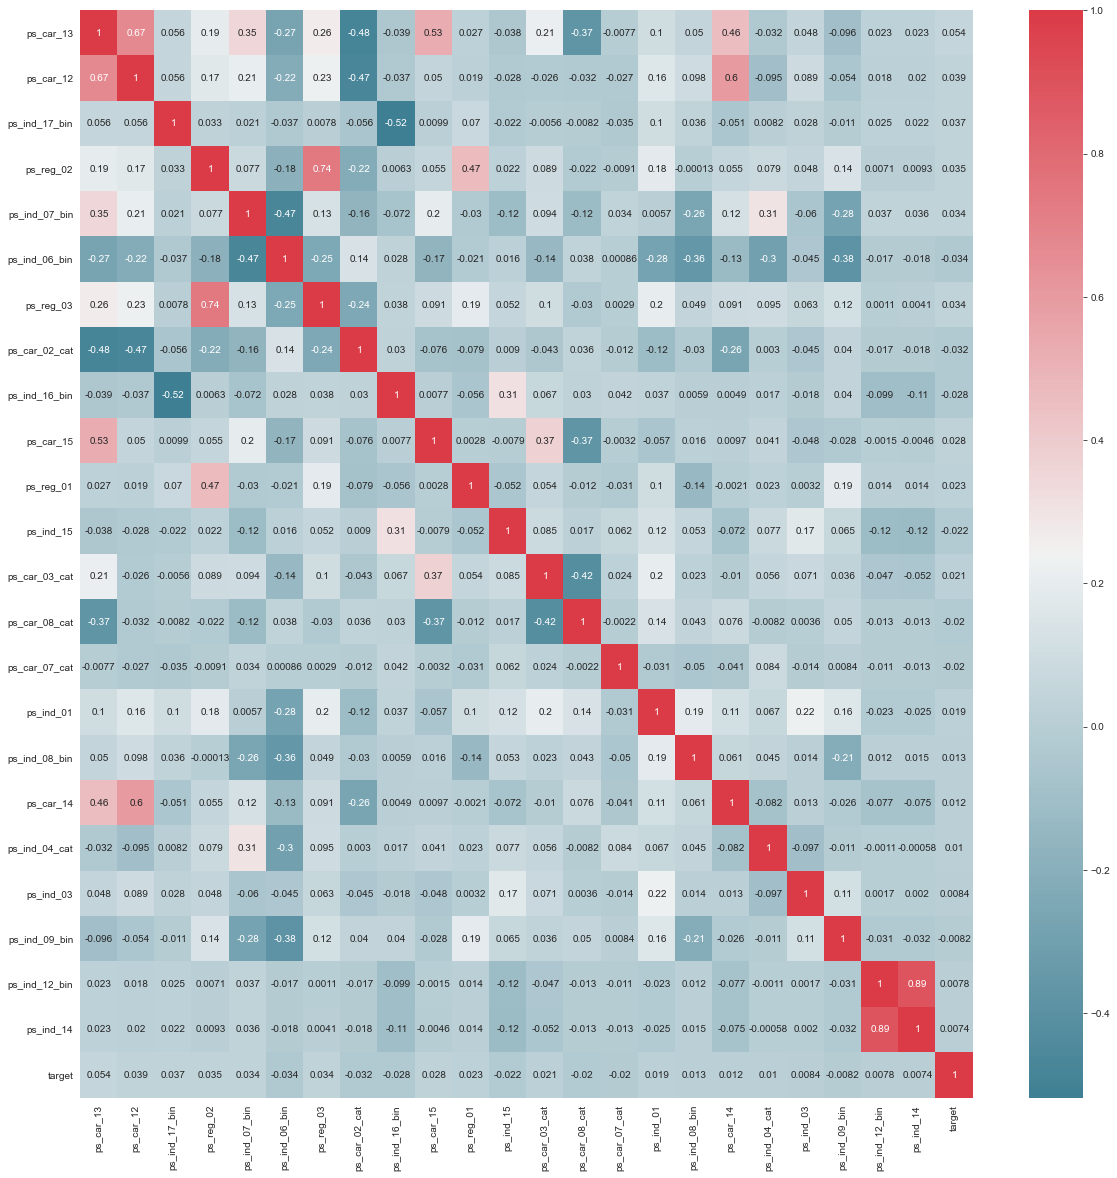

In [23]:
sns.set_style('white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(20, 20))
sns.heatmap(df_fs1[bin_num_feat].iloc[:df_train.shape[0]].corr(), annot = True, cmap = cmap)
plt.plot()

After selecting our key features, we note that some of them are correlated with one another.

Multicollinearity occurs when one predictor is highly correlated with another predictor. Consequences of multicollinearity are imprecise predictors, standard errors of predictors tend to be higher.

To test whether multicollinearity is an issue in our case, we can turn to the Variance Inflation Factor. Simply put, it uses a rule of thumb that R^2 > 0.9. Using that formula, R is approximated to be 0.95.

To be stricter, we impose a correlation threshold of 0.9 (slightly stricter than the 0.95 rule of thumb) in our selection of independent features. Using this threshold, we remove the feature `ps_ind_14`, as it has a correlation of 0.89 with the another feature, `ps_ind_12_bin`. Also, we note that the feature has a lower correlation with the target label compared to the other feature, `ps_ind_12_bin`.

In [24]:
del df_fs1['ps_ind_14']

We haven't done anything to the missing values yet so let's proceed to impute our missing data.

First, we begin by finding whether there are any NA values which requires us to impute.

In [25]:
np.sum(df_fs1.isnull())

ps_car_13              0
ps_car_12              1
ps_ind_17_bin          0
ps_reg_02              0
ps_ind_07_bin          0
ps_ind_06_bin          0
ps_reg_03         269456
ps_car_02_cat         10
ps_ind_16_bin          0
ps_car_15              0
ps_reg_01              0
ps_ind_15              0
ps_car_03_cat    1028142
ps_car_08_cat          0
ps_car_07_cat      28820
ps_ind_01              0
ps_ind_08_bin          0
ps_car_14         106425
ps_ind_04_cat        228
ps_ind_03              0
ps_ind_09_bin          0
ps_ind_12_bin          0
ps_ind_02_cat        523
ps_ind_05_cat      14519
ps_car_01_cat        267
ps_car_04_cat          0
ps_car_05_cat     666910
ps_car_06_cat          0
ps_car_09_cat       1446
ps_car_10_cat          0
ps_car_11_cat          0
target            892816
dtype: int64

Let's remove features where missing values account for at least 20% of the data.

In [26]:
[feat for feat in df_fs1.columns.tolist() 
 if np.sum(pd.isnull(df_fs1[feat])) > (df_fs1.shape[0])*0.20]

['ps_car_03_cat', 'ps_car_05_cat', 'target']

In [27]:
del df_fs1['ps_car_03_cat']
del df_fs1['ps_car_05_cat']

For categorical features which have missing values, we can circumvent this issue by creating a new category for it.

In [28]:
[feat for feat in df_fs1.columns.tolist() 
 if feat.endswith('cat') and ((np.sum(pd.isnull(df_fs1[feat]))) > 0)]

['ps_car_02_cat',
 'ps_car_07_cat',
 'ps_ind_04_cat',
 'ps_ind_02_cat',
 'ps_ind_05_cat',
 'ps_car_01_cat',
 'ps_car_09_cat']

In [29]:
df_fs1.ps_car_02_cat.fillna('-1', inplace = True)
df_fs1.ps_car_07_cat.fillna('-1', inplace = True)
df_fs1.ps_ind_04_cat.fillna('-1', inplace = True)
df_fs1.ps_car_01_cat.fillna('-1', inplace = True)
df_fs1.ps_car_09_cat.fillna('-1', inplace = True)
df_fs1.ps_ind_02_cat.fillna('-1', inplace = True)
df_fs1.ps_ind_05_cat.fillna('-1', inplace = True)

C:\Users\gopik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Lets check if there are any other columns with missing values

In [30]:
[feat for feat in df_fs1.columns.tolist() 
 if np.sum(pd.isnull(df_fs1[feat])) > 0]

['ps_car_12', 'ps_reg_03', 'ps_car_14', 'target']

For these features, let's use the median of these features to impute the missing values.

In [31]:
df_fs1['ps_car_12'].fillna(df_fs1['ps_car_12'].median(), inplace = True)
df_fs1['ps_reg_03'].fillna(df_fs1['ps_reg_03'].median(), inplace = True)
df_fs1['ps_car_14'].fillna(df_fs1['ps_car_14'].median(), inplace = True)

In [32]:
np.sum(df_fs1.isnull())

ps_car_13             0
ps_car_12             0
ps_ind_17_bin         0
ps_reg_02             0
ps_ind_07_bin         0
ps_ind_06_bin         0
ps_reg_03             0
ps_car_02_cat         0
ps_ind_16_bin         0
ps_car_15             0
ps_reg_01             0
ps_ind_15             0
ps_car_08_cat         0
ps_car_07_cat         0
ps_ind_01             0
ps_ind_08_bin         0
ps_car_14             0
ps_ind_04_cat         0
ps_ind_03             0
ps_ind_09_bin         0
ps_ind_12_bin         0
ps_ind_02_cat         0
ps_ind_05_cat         0
ps_car_01_cat         0
ps_car_04_cat         0
ps_car_06_cat         0
ps_car_09_cat         0
ps_car_10_cat         0
ps_car_11_cat         0
target           892816
dtype: int64

### My Contributions: 

I used Variance Inflation Factor to remove the multicolliniarity in the data.